In [1]:
# 필요한 라이브러리, 모듈 import
import pandas as pd
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt

In [2]:
# 액셀을 불러와 데이터프레임으로 변환
file_name = 'AHP.xlsx'
ahp_df = pd.read_excel(file_name, index_col = 0)
ahp_df

,복지,요양,경로,대학,지하철,버스,설치면적
복지,1.000000,1.708333,1.475309,0.195513,1.326923,1.397436,1
요양,0.585366,1.000000,2.665672,0.185410,1.256098,1.332317,1
경로,0.677824,0.375140,1.000000,0.127083,0.874477,0.914046,1
대학,5.114754,5.393443,7.868852,1.000000,6.754098,7.147541,1
지하철,0.753623,0.796117,1.143541,0.148058,1.000000,1.119159,1
버스,0.715596,0.750572,1.094037,0.139908,0.893528,1.000000,1
설치면적,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [3]:
# 데이터프레임의 컬럼수 파악
colums_cnt = len(ahp_df.columns)
colums_cnt

7

In [4]:
# 각 컬럼의 기하평균을 계산하여 리스트에 저장
geo_mean_list = []
for i in ahp_df:
    geo_mean_list.append(gmean(ahp_df[i]))

In [5]:
# 기하평균 출력
print('기하평균 (Geometric mean)\n')
for i,j in zip(ahp_df, geo_mean_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

기하평균 (Geometric mean)

복지 : 1.0129751748809863
요양 : 1.1091752021944643
경로 : 1.6859342559352546
대학 : 0.2664818760778892
지하철 : 1.3642658879087208
버스 : 1.4520905995156133
설치면적 : 1.0


In [6]:
# 데이터프레임에 기하평균값 추가
ahp_df = ahp_df.append(pd.Series(geo_mean_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,복지,요양,경로,대학,지하철,버스,설치면적
0,1.000000,1.708333,1.475309,0.195513,1.326923,1.397436,1.0
1,0.585366,1.000000,2.665672,0.185410,1.256098,1.332317,1.0
2,0.677824,0.375140,1.000000,0.127083,0.874477,0.914046,1.0
3,5.114754,5.393443,7.868852,1.000000,6.754098,7.147541,1.0
4,0.753623,0.796117,1.143541,0.148058,1.000000,1.119159,1.0
5,0.715596,0.750572,1.094037,0.139908,0.893528,1.000000,1.0
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
7,1.012975,1.109175,1.685934,0.266482,1.364266,1.452091,1.0


In [7]:
# 가중치 계산을 위하여 기하평균의 합을 구함
geo_mean_sum = sum(geo_mean_list)
geo_mean_sum

7.890922996512928

In [8]:
# 각 컬럼의 가중치를 계산하여 리스트에 저장
weights_list = []
for i in range(colums_cnt):
    weights_list.append(geo_mean_list[i]/geo_mean_sum)

In [9]:
# 기하평균 출력
print('가중치 (Weights)\n')
for i,j in zip(ahp_df, weights_list):
    print('{} : {}'.format(i, j))
    #print('{} : {}'.format(i, round(j,3)))  # 소수점 3 자리수

가중치 (Weights)

복지 : 0.12837220377497405
요양 : 0.14056342999223528
경로 : 0.21365488633969493
대학 : 0.033770685152503706
지하철 : 0.17289053365640528
버스 : 0.18402037380890748
설치면적 : 0.12672788727527937


In [10]:
# 데이터프레임에 가중치 값 추가
ahp_df = ahp_df.append(pd.Series(weights_list, index=ahp_df.columns),ignore_index=True)
ahp_df

,복지,요양,경로,대학,지하철,버스,설치면적
0,1.000000,1.708333,1.475309,0.195513,1.326923,1.397436,1.000000
1,0.585366,1.000000,2.665672,0.185410,1.256098,1.332317,1.000000
2,0.677824,0.375140,1.000000,0.127083,0.874477,0.914046,1.000000
3,5.114754,5.393443,7.868852,1.000000,6.754098,7.147541,1.000000
4,0.753623,0.796117,1.143541,0.148058,1.000000,1.119159,1.000000
5,0.715596,0.750572,1.094037,0.139908,0.893528,1.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.012975,1.109175,1.685934,0.266482,1.364266,1.452091,1.000000
8,0.128372,0.140563,0.213655,0.033771,0.172891,0.184020,0.126728


In [11]:
# 인덱스명 변경
ahp_df_result = ahp_df.rename({0:'복지', 1:'요양', 2:'경로', 3:'대학', 4:'지하철', 5:'버스',6:'설치면적',7:'기하평균',8:'가중치'}, axis=0)
ahp_df_result

,복지,요양,경로,대학,지하철,버스,설치면적
복지,1.000000,1.708333,1.475309,0.195513,1.326923,1.397436,1.000000
요양,0.585366,1.000000,2.665672,0.185410,1.256098,1.332317,1.000000
경로,0.677824,0.375140,1.000000,0.127083,0.874477,0.914046,1.000000
대학,5.114754,5.393443,7.868852,1.000000,6.754098,7.147541,1.000000
지하철,0.753623,0.796117,1.143541,0.148058,1.000000,1.119159,1.000000
버스,0.715596,0.750572,1.094037,0.139908,0.893528,1.000000,1.000000
설치면적,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
기하평균,1.012975,1.109175,1.685934,0.266482,1.364266,1.452091,1.000000
가중치,0.128372,0.140563,0.213655,0.033771,0.172891,0.184020,0.126728


In [12]:
# 데이터프레임을 csv로 저장
ahp_df_result.to_csv('AHP_가중치산정_결과.csv',index=True , sep=',', encoding='cp949')

In [13]:
# 가중치 결과만 가지고 있는 데이터프레임 생성
ahp_df_result_weights = ahp_df_result.loc[['가중치'],['복지','요양','경로','대학','지하철','버스','설치면적']]
ahp_df_result_weights = ahp_df_result_weights.T  # 전치
ahp_df_result_weights

,가중치
복지,0.128372
요양,0.140563
경로,0.213655
대학,0.033771
지하철,0.172891
버스,0.184020
설치면적,0.126728


In [14]:
# 가중치 합 확인
su_ = sum(ahp_df_result_weights['가중치'])
print(su_)

1.0


In [15]:
# 그래프 한글 출력을 위함
plt.rcParams['font.family'] = 'Malgun Gothic' 

<AxesSubplot:xlabel='< 시 설 >'>

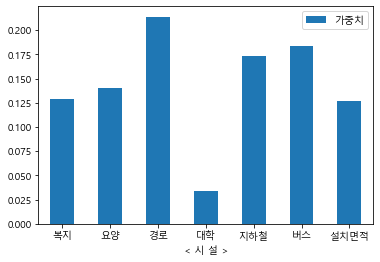

In [16]:
# 막대그래프 생성
bar_plot = ahp_df_result_weights.plot.bar(rot=0, xlabel = '< 시 설 >', ylabel = '')
bar_plot

In [17]:
# 막대그래프 결과를 저장
fig = bar_plot.get_figure()
fig.savefig("AHP_막대그래프",dpi=200)